In [24]:
import pandas as pd
import json

# Carregando os dados
with open('TelecomX_Data.json', encoding='utf-8') as f:
    data = json.load(f)

# Expandindo o JSON aninhado em um DataFrame
df = pd.json_normalize(data)

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [25]:
# Ver tipos de dados e colunas
df.info()

# Verificar colunas únicas e estrutura
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [26]:
# Valores nulos
df.isnull().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [27]:
# Verificar valores únicos em colunas categóricas
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '37

In [28]:
# Remover registros com Churn vazio
df = df[df['Churn'].isin(['Yes', 'No'])]

In [29]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# valores nulos
df['account.Charges.Total'].isnull().sum()

11

In [30]:
df = df[df['account.Charges.Total'].notnull()]
df['account.Charges.Total'].isnull().sum()

0

In [31]:
replace_cols = ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                'phone.MultipleLines']

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [32]:
# Verificar valores únicos em colunas categóricas
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes']
internet.OnlineBackup: ['Yes' 'No']
internet.DeviceProtection: ['No' 'Yes']
internet.TechSupport: ['Yes' 'No']
internet.StreamingTV: ['Yes' 'No']
internet.StreamingMovies: ['No' 'Yes']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [33]:
# Verificar duplicatas de customerID (precaução)
df['customerID'].duplicated().sum()

0

In [34]:
# Criando coluna Contas_Diarias com base em 30 dias
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

In [35]:
df['Contas_Diarias']

0       2.186667
1       1.996667
2       2.463333
3       3.266667
4       2.796667
          ...   
7262    1.838333
7263    2.836667
7264    1.676667
7265    2.261667
7266    1.966667
Name: Contas_Diarias, Length: 7032, dtype: float64

In [36]:
# Detectar colunas com valores 'Yes' e 'No'
yes_no_cols = [col for col in df.columns if df[col].isin(['Yes', 'No']).all()]

# Converter Yes/No para 1/0
df[yes_no_cols] = df[yes_no_cols].replace({'Yes': 1, 'No': 0})


C:\Users\fabio\AppData\Local\Temp\ipykernel_4172\3490533759.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_cols] = df[yes_no_cols].replace({'Yes': 1, 'No': 0})


In [37]:
df.rename(columns={
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Possui_Parceiro',
    'customer.Dependents': 'Possui_Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefone',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Tipo_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Fatura_Digital',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Fatura_Mensal',
    'account.Charges.Total': 'Fatura_Total',
    'Churn': 'Evasao',
    'Contas_Diarias': 'Fatura_Diaria'
}, inplace=True)


In [38]:
df.head()

,customerID,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Fatura_Mensal,Fatura_Total,Fatura_Diaria
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


## Análise Descritiva

### Estatísticas descritivas para variáveis numéricas

In [49]:
df[['Fatura_Mensal', 'Fatura_Total', 'Fatura_Diaria', 'Meses_Contrato']].describe().T

,count,mean,std,min,25%,50%,75%,max
Fatura_Mensal,7032.0,64.798208,30.085974,18.250000,35.58750,70.350,89.862500,118.750000
Fatura_Total,7032.0,2283.300441,2266.771362,18.800000,401.45000,1397.475,3794.737500,8684.800000
Fatura_Diaria,7032.0,2.159940,1.002866,0.608333,1.18625,2.345,2.995417,3.958333
Meses_Contrato,7032.0,32.421786,24.545260,1.000000,9.00000,29.000,55.000000,72.000000


### Medidas individuais

In [40]:
print("Média da Fatura Mensal:", df['Fatura_Mensal'].mean())
print("Mediana da Fatura Mensal:", df['Fatura_Mensal'].median())
print("Desvio padrão da Fatura Mensal:", df['Fatura_Mensal'].std())

Média da Fatura Mensal: 64.79820819112628
Mediana da Fatura Mensal: 70.35
Desvio padrão da Fatura Mensal: 30.085973884049906


In [41]:
print("Média da Fatura Mensal:", df['Fatura_Total'].mean())
print("Mediana da Fatura Mensal:", df['Fatura_Total'].median())
print("Desvio padrão da Fatura Mensal:", df['Fatura_Total'].std())

Média da Fatura Mensal: 2283.3004408418656
Mediana da Fatura Mensal: 1397.475
Desvio padrão da Fatura Mensal: 2266.771361883145


In [42]:
print("Média da Fatura Mensal:", df['Fatura_Diaria'].mean())
print("Mediana da Fatura Mensal:", df['Fatura_Diaria'].median())
print("Desvio padrão da Fatura Mensal:", df['Fatura_Diaria'].std())

Média da Fatura Mensal: 2.1599402730375425
Mediana da Fatura Mensal: 2.3449999999999998
Desvio padrão da Fatura Mensal: 1.0028657961349958


In [57]:
print("Média da Fatura Mensal:", df['Meses_Contrato'].mean())
print("Mediana da Fatura Mensal:", df['Meses_Contrato'].median())
print("Desvio padrão da Fatura Mensal:", df['Meses_Contrato'].std())

Média da Fatura Mensal: 32.421786120591584
Mediana da Fatura Mensal: 29.0
Desvio padrão da Fatura Mensal: 24.54525970926324


### Boxplot 

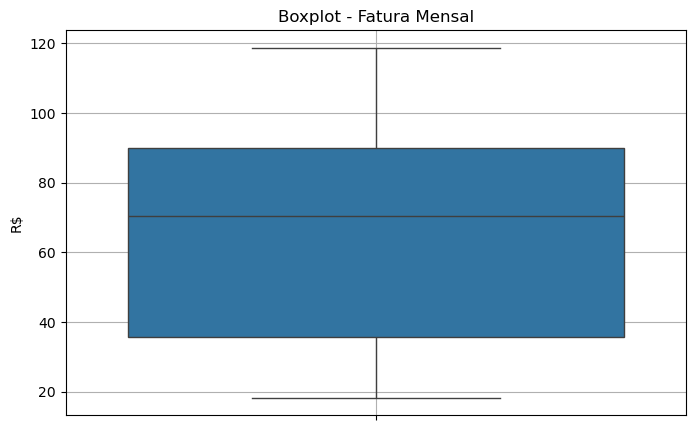

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Fatura_Mensal'])
plt.title('Boxplot - Fatura Mensal')
plt.ylabel('R$')
plt.grid(True)
plt.show()

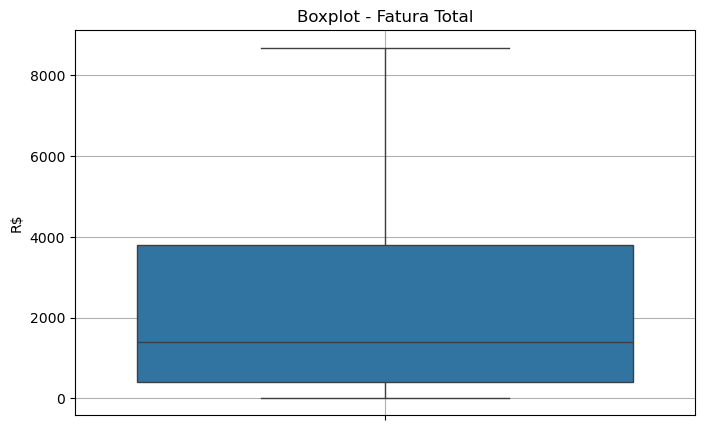

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Fatura_Total'])
plt.title('Boxplot - Fatura Total')
plt.ylabel('R$')
plt.grid(True)
plt.show()

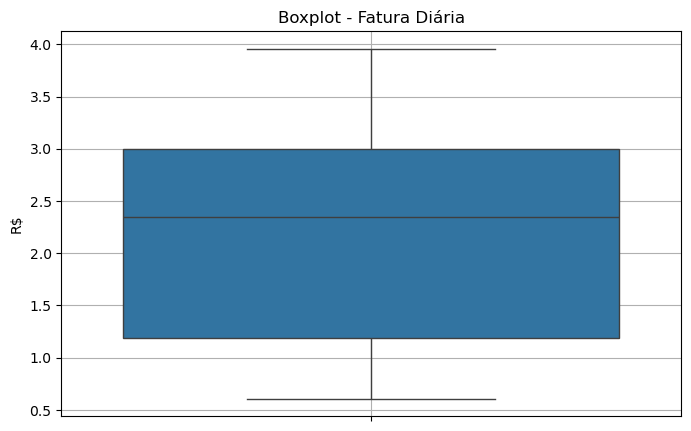

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Fatura_Diaria'])
plt.title('Boxplot - Fatura Diária')
plt.ylabel('R$')
plt.grid(True)
plt.show()

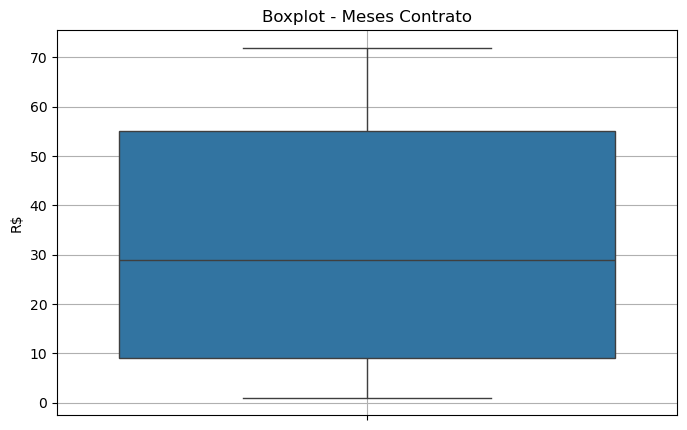

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Meses_Contrato'])
plt.title('Boxplot - Meses Contrato')
plt.ylabel('R$')
plt.grid(True)
plt.show()

### Histograma com linha de média e mediana

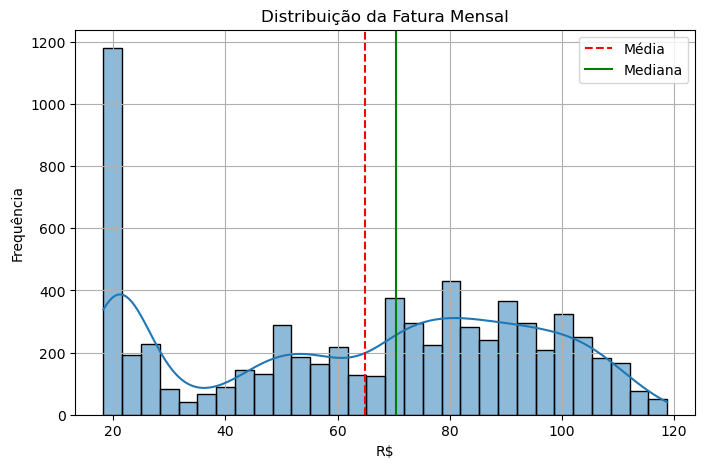

In [60]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Fatura_Mensal'], kde=True, bins=30)
plt.axvline(df['Fatura_Mensal'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df['Fatura_Mensal'].median(), color='green', linestyle='-', label='Mediana')
plt.title('Distribuição da Fatura Mensal')
plt.xlabel('R$')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()


### Distribuição de categorias

In [61]:
df['Tipo_Internet'].value_counts(normalize=True) * 100  # Em percentual
df['Tipo_Contrato'].value_counts()
df['Metodo_Pagamento'].value_counts()

Metodo_Pagamento
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

## Distribuição da Evasão

### Taxa geral de evasão

In [63]:
df['Evasao'].mean() * 100  # Percentual de clientes que saíram

26.578498293515356

C:\Users\fabio\AppData\Local\Temp\ipykernel_4172\3546609636.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Evasao', data=df, palette='Set2')


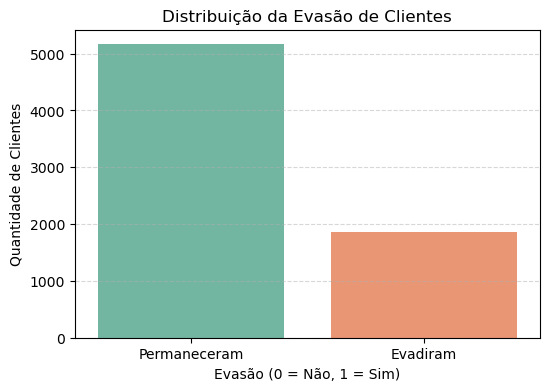

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de contagem de evasão
plt.figure(figsize=(6, 4))
sns.countplot(x='Evasao', data=df, palette='Set2')
plt.title('Distribuição da Evasão de Clientes')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Clientes')
plt.xticks([0, 1], ['Permaneceram', 'Evadiram'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

### Evasão por categoria

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_evasao_por_categoria(df, coluna, figsize=(7, 4)):
    plt.figure(figsize=figsize)
    sns.countplot(x=coluna, hue='Evasao', data=df, palette='Set2')
    plt.title(f'Evasão por {coluna}')
    plt.xlabel(coluna.replace('_', ' '))
    plt.ylabel('Quantidade de Clientes')
    plt.legend(title='Evasão', labels=['Permaneceram (0)', 'Evadiram (1)'])
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

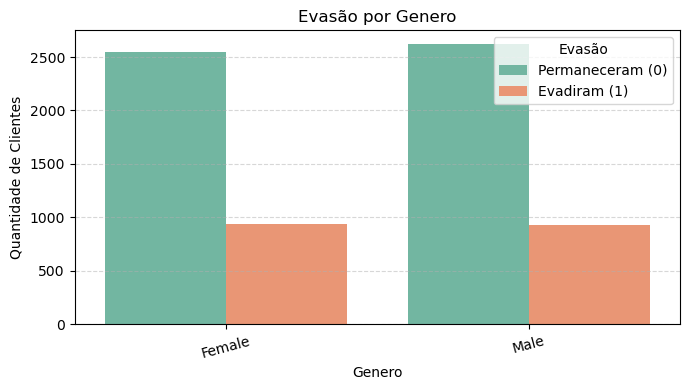

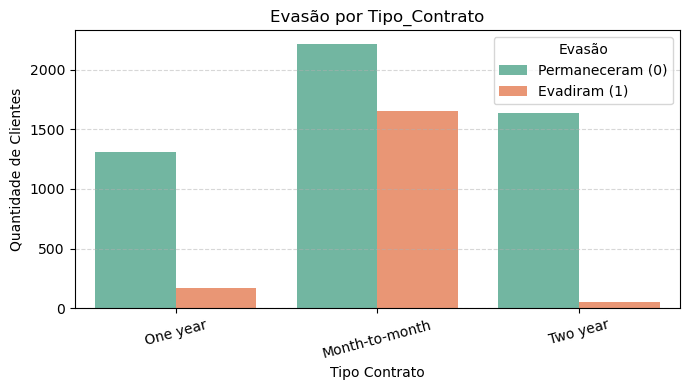

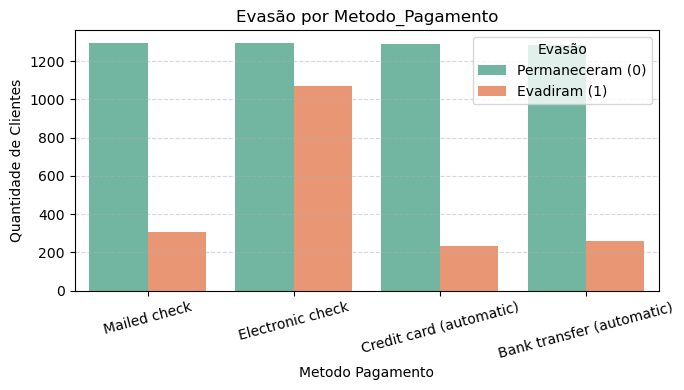

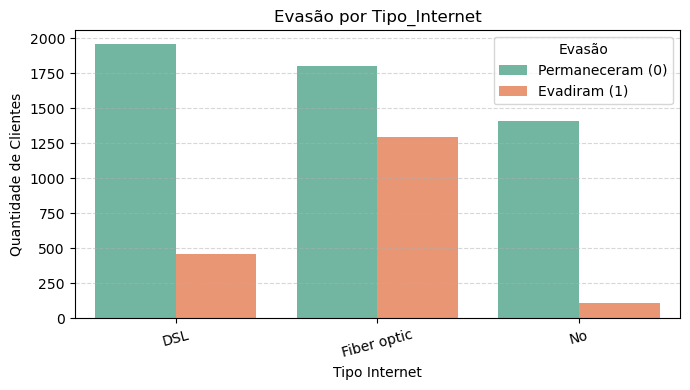

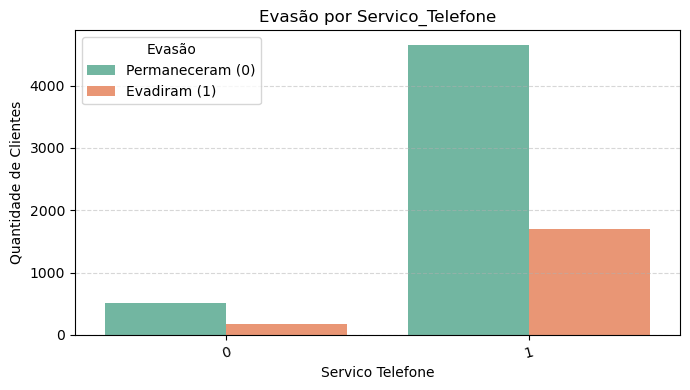

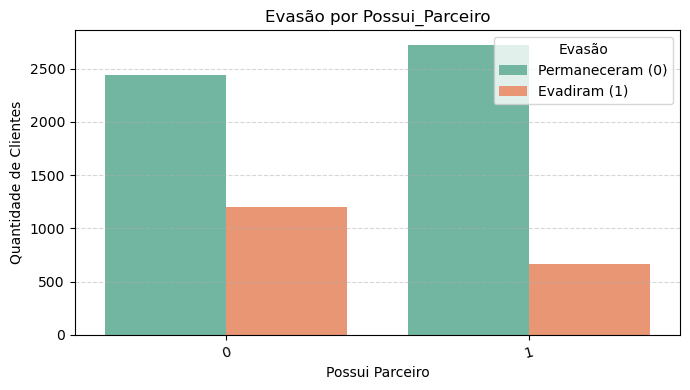

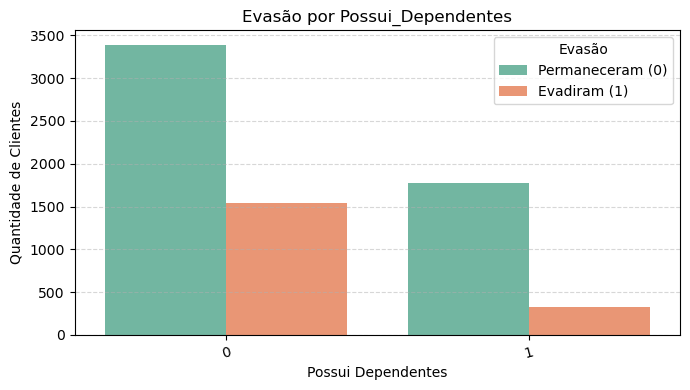

In [69]:
plot_evasao_por_categoria(df, 'Genero')
plot_evasao_por_categoria(df, 'Tipo_Contrato')
plot_evasao_por_categoria(df, 'Metodo_Pagamento')
plot_evasao_por_categoria(df, 'Tipo_Internet')
plot_evasao_por_categoria(df, 'Servico_Telefone')
plot_evasao_por_categoria(df, 'Possui_Parceiro')
plot_evasao_por_categoria(df, 'Possui_Dependentes')


### Análise de variáveis numéricas por Evasão

In [72]:
def comparar_distribuicao_por_evasao(df, coluna, bins=30):
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 5))

    # Gráfico 1: Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Evasao', y=coluna, data=df, palette='Set2')
    plt.title(f'Boxplot - {coluna}')
    plt.xlabel('Evasão (0 = Não, 1 = Sim)')
    plt.ylabel(coluna.replace('_', ' '))
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)

    # Gráfico 2: Distribuição KDE
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=coluna, hue='Evasao', kde=True, bins=bins, palette='Set2', stat='density', common_norm=False)
    plt.title(f'Distribuição - {coluna} por Evasão')
    plt.xlabel(coluna.replace('_', ' '))
    plt.ylabel('Densidade')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

C:\Users\fabio\AppData\Local\Temp\ipykernel_4172\2241204614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y=coluna, data=df, palette='Set2')


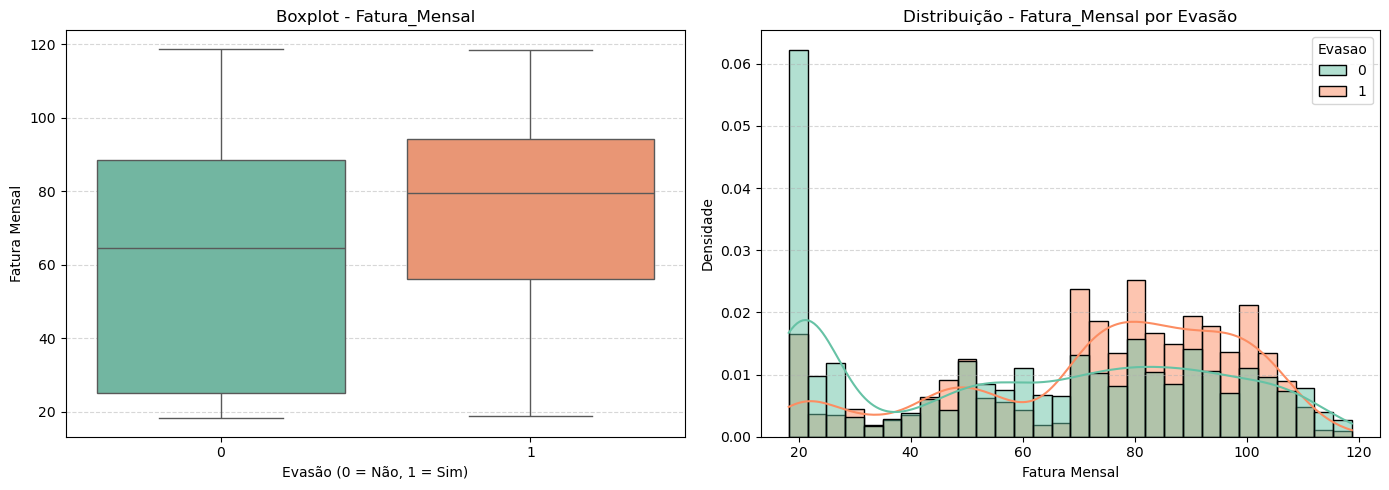

C:\Users\fabio\AppData\Local\Temp\ipykernel_4172\2241204614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y=coluna, data=df, palette='Set2')


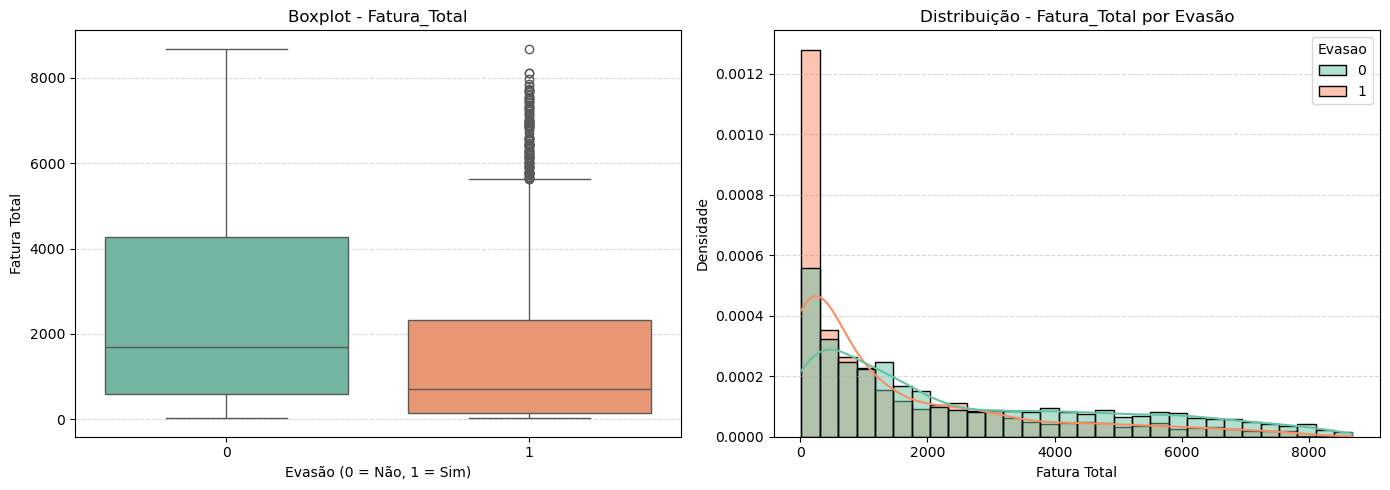

C:\Users\fabio\AppData\Local\Temp\ipykernel_4172\2241204614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y=coluna, data=df, palette='Set2')


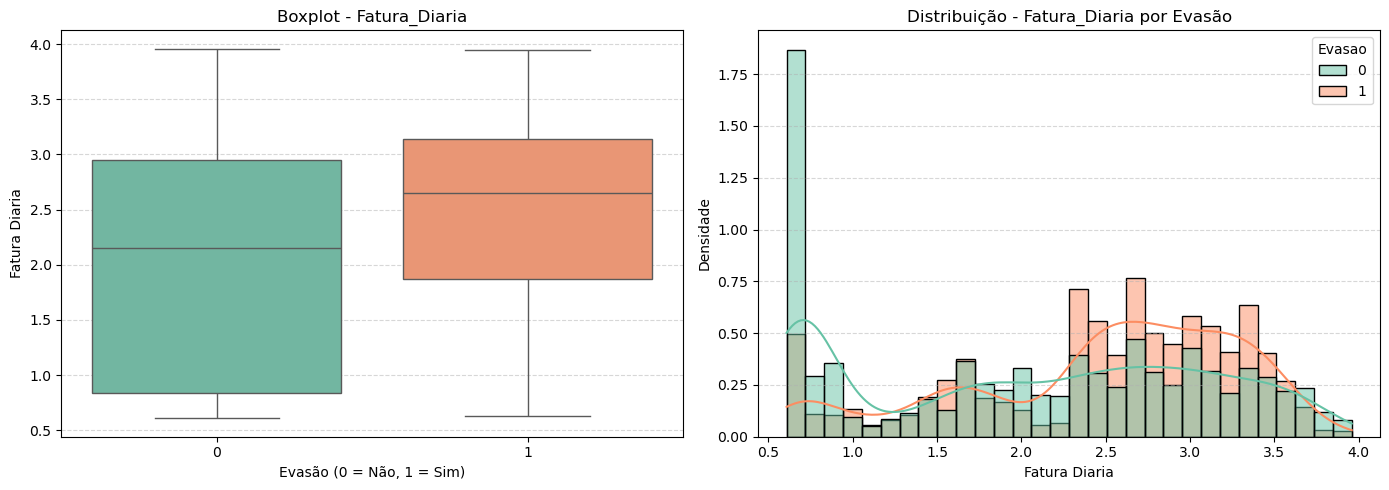

C:\Users\fabio\AppData\Local\Temp\ipykernel_4172\2241204614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y=coluna, data=df, palette='Set2')


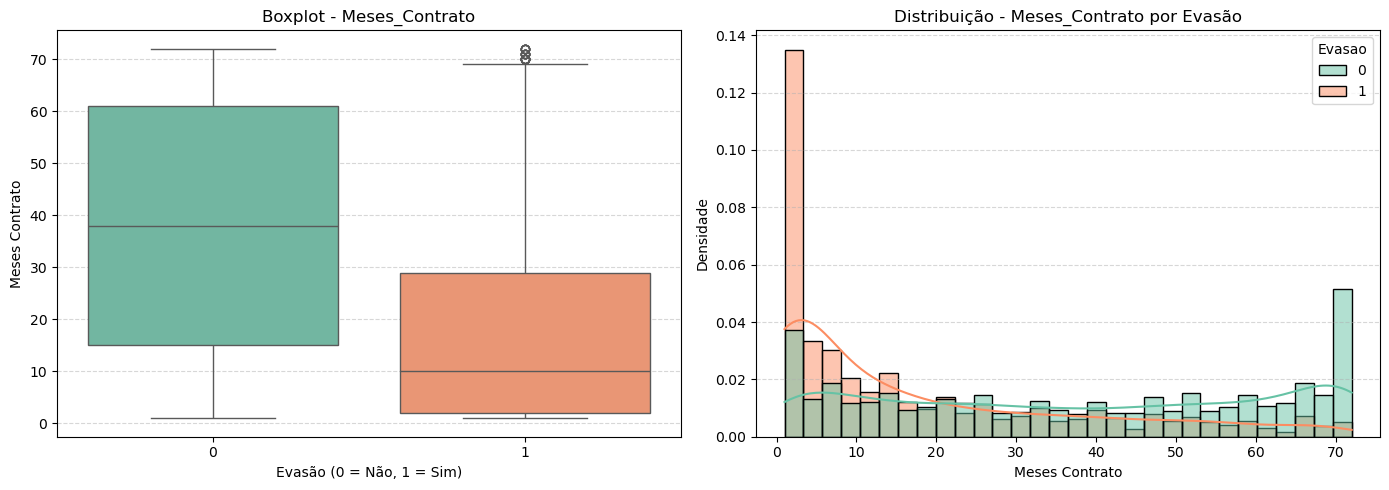

In [74]:
comparar_distribuicao_por_evasao(df, 'Fatura_Mensal')
comparar_distribuicao_por_evasao(df, 'Fatura_Total')
comparar_distribuicao_por_evasao(df, 'Fatura_Diaria')
comparar_distribuicao_por_evasao(df, 'Meses_Contrato')

### Correlação entre variáveis numéricas

In [46]:
df.corr(numeric_only=True)

,Evasao,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Fatura_Digital,Fatura_Mensal,Fatura_Total,Fatura_Diaria
Evasao,1.000000,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.040033,-0.171270,-0.082307,-0.066193,-0.164716,0.063254,0.060860,0.191454,0.192858,-0.199484,0.192858
Idoso,0.150541,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,0.156258,0.219874,0.102411,0.219874
Possui_Parceiro,-0.149982,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,-0.013957,0.097825,0.319072,0.097825
Possui_Dependentes,-0.163128,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,-0.110131,-0.112343,0.064653,-0.112343
Meses_Contrato,-0.354049,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.004823,0.246862,0.825880,0.246862
Servico_Telefone,0.011691,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.016696,0.248033,0.113008,0.248033
Multiplas_Linhas,0.040033,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.163746,0.490912,0.469042,0.490912
Seguranca_Online,-0.171270,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,-0.004051,0.296447,0.412619,0.296447
Backup_Online,-0.082307,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.127056,0.441529,0.510100,0.441529
Protecao_Dispositivo,-0.066193,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,0.332850,0.389924,0.402309,0.104079,0.482607,0.522881,0.482607


# 📊 Relatório Final - Análise de Evasão de Clientes (Telecom X)

## 🧠 Introdução

A Telecom X está enfrentando um alto índice de **evasão de clientes (churn)** e busca compreender os fatores que levam ao cancelamento de seus serviços.  
Este relatório apresenta uma análise exploratória dos dados de clientes com o objetivo de **identificar padrões comportamentais** e **fornecer insights estratégicos** que contribuam para a retenção.

---

## 🧹 Limpeza e Tratamento de Dados

As etapas executadas foram:

- Extração dos dados em formato JSON via API.
- Conversão para DataFrame utilizando `pandas`.
- Verificação e remoção de:
  - Registros com `Churn` vazio.
  - Registros com `Fatura_Total` inválido (`NaN`).
- Conversão da coluna `Fatura_Total` de `object` para `float`.
- Substituição de valores como `'No internet service'` e `'No phone service'` por `'No'`.
- Criação da coluna `Fatura_Diaria` a partir de `Fatura_Mensal / 30`.
- Padronização de variáveis categóricas (Yes/No → 1/0).
- Renomeação de colunas para facilitar a leitura e interpretação.

---

## 📊 Análise Exploratória de Dados

### 📌 Distribuição Geral

- A maioria dos clientes paga entre **R$20 e R$100 por mês**, com uma concentração grande em **valores baixos (~R$20)**.
- Clientes que evadiram tendem a ter **menor tempo de contrato e menor faturamento total acumulado**.

### 📌 Distribuição da Evasão

- A taxa de evasão está em torno de **26.57%%** dos clientes.
- Clientes com **contrato mensal ("Month-to-month")** apresentam a maior taxa de churn.
- O método de pagamento com maior evasão é **"Electronic Check"**.

### 📌 Comparações por Categoria

- **Tipo de Contrato**:
  - Contrato mensal tem evasão bem mais alta do que contratos anuais ou bienais.
- **Método de Pagamento**:
  - Métodos automáticos têm menor evasão.
- **Gênero, parceiro, dependentes**:
  - Pequenas variações, mas clientes **sem dependentes ou sem parceiro** tendem a evadir mais.

### 📌 Comparações por Variáveis Numéricas

- **Menor Fatura Total e Menor Tempo de Contrato** estão claramente associados à evasão.
- **Fatura Mensal e Diária** mostram padrões menos claros, mas há tendência de evasão nos extremos (valores muito baixos ou muito altos).

---

## 📌 Conclusões e Insights

- **Clientes com contratos mensais e faturamento acumulado baixo** são os que mais evadem.
- A evasão ocorre mais com **clientes de entrada recente** (baixa fidelização).
- Métodos automáticos de pagamento podem ter efeito positivo na retenção.

---

## 💡 Recomendações

1. **Focar na retenção de novos clientes nos primeiros meses** com campanhas de fidelização.
2. **Oferecer incentivos para migração para contratos anuais**, que apresentam menor churn.
3. **Promover métodos automáticos de pagamento**, especialmente para clientes com alto risco de evasão.
4. Monitorar clientes com **baixa utilização** (fatura mensal muito baixa), pois podem estar propensos a cancelar.
5. Considerar modelo preditivo com as variáveis tratadas para **antecipar comportamentos de evasão**.

---

## ✅ Encerramento

Este relatório fornece uma base sólida para que o time de Data Science da Telecom X avance com **modelagem preditiva de churn** e **ações estratégicas para retenção**. Todos os dados, análises e gráficos utilizados estão documentados neste notebook.

